### 선형 회귀로 알아보는 학습률의 중요성

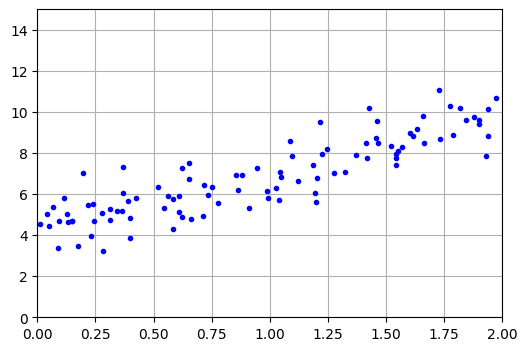

In [170]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 난수를 이용한 데이터 생성
X = np.random.rand(100, 1) * 2
y = 3 * X + np.random.randn(100, 1) + 4

plt.figure(figsize = (6, 4))

plt.plot(X, y, 'b.')
plt.grid()
plt.axis([0, 2, 0, 15])

plt.show()

In [171]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# y절편과 기울기
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

[[4.21509616]
 [9.75532293]]


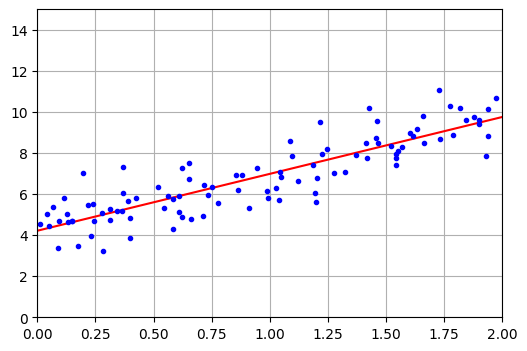

In [172]:
X_new = [[0], [2]]
y_pred = lin_reg.predict(X_new)
print(y_pred)

plt.figure(figsize = (6, 4))

plt.plot(X_new, y_pred, 'r-') # (0, 4.215), (2, 9.755)를 지나는 직선
plt.plot(X, y, 'b.')
plt.grid()
plt.axis([0, 2, 0, 15])

plt.show()

In [173]:
import matplotlib as mpl
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
X_new_b = add_dummy_feature(X_new)

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)

        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients

        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

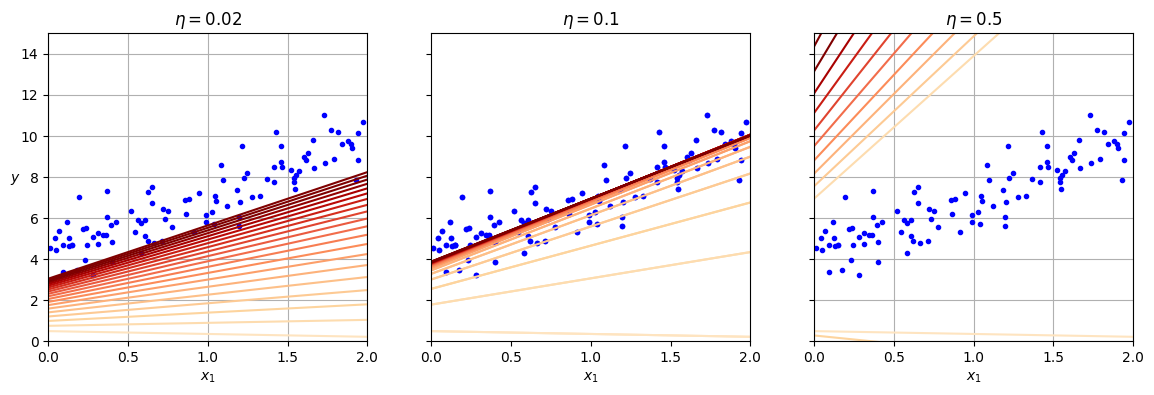

In [174]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(14, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()

### 다항 회귀로 알아보는 학습 곡선, 과대/과소적합과 규제

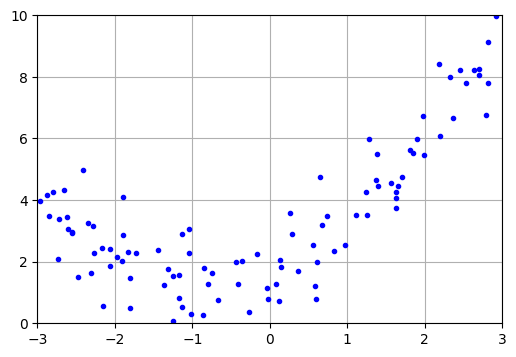

In [175]:
np.random.seed(42)

# 2차 함수와 비슷한 모양을 가진 데이터 생성
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

plt.figure(figsize = (6, 4))

plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()

In [176]:
# 선형 회귀 모델 훈련

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

[[1.03315352]
 [6.09487734]]


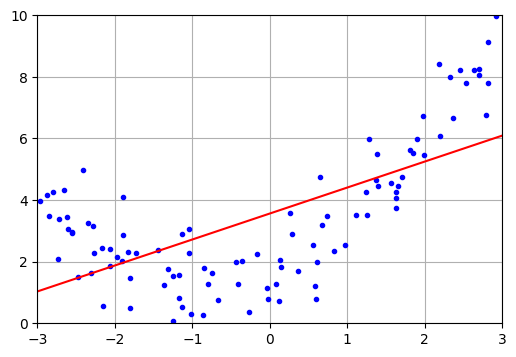

In [177]:
X_new = [[-3], [3]]
y_pred = lin_reg.predict(X_new)
print(y_pred)

plt.figure(figsize = (6, 4))

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-') # (-3, 1.033), (3, 6.094)를 지나는 직선
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()

# 선형 회귀는 기본적으로 1차 함수 형태를 하고 있어 2차 함수처럼 생긴 모양에 잘 적응할 수 없다.

기존 데이터 X에는 하나의 값 $x$만 존재한다. $x^2$에 해당하는 값을 추가해본다.

In [178]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias=False) # degree : 차수 지정, 여기서는 2차
X_poly = poly_features.fit_transform(X)

In [179]:
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [180]:
# 2차 항을 추가한 후 다시 선형 회귀 적용

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

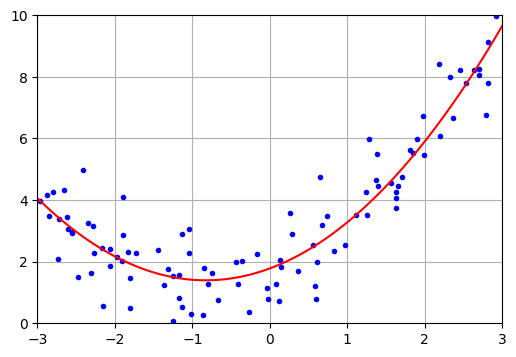

In [181]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # -3부터 3까지 100등분한 리스트 생성, (100, 1)로 모양 변경
X_new_poly = poly_features.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.figure(figsize = (6, 4))

plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred, 'r-')
plt.grid()
plt.axis([-3, 3, 0, 10])

plt.show()

# 선형 회귀 모델은 2차, 3차 등 다차항을 추가하고 훈련하면 비선형 회귀 훈련이 가능하다.

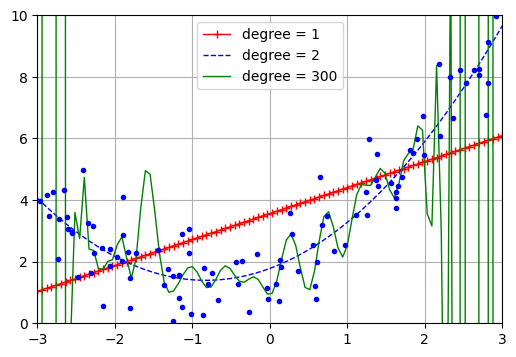

In [184]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize = (6, 4))

for degree, style in [(1, 'r-+'), (2, 'b--'), (300, 'g-')]:
  poly_features = PolynomialFeatures(degree = degree, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  X_new_poly = poly_features.transform(X_new)

  scaler = StandardScaler()
  X_poly = scaler.fit_transform(X_poly)
  X_new_poly = scaler.transform(X_new_poly)

  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y)
  y_pred = lin_reg.predict(X_new_poly)
  plt.plot(X_new, y_pred, style, label = f'degree = {degree}', linewidth = 1)

plt.plot(X, y, 'b.')
plt.grid()
plt.axis([-3, 3, 0, 10])
plt.legend()

plt.show()

# 1차 선형 회귀 : 과소적합
# 2차 다항 회귀 : 최적의 모델
# 300차 다항 회귀 : 과대 적합

In [191]:
# 과소 적합 모델의 학습 곡선

from sklearn.model_selection import learning_curve

train_size, train_score, valid_score = learning_curve(
    LinearRegression(), X, y,
    train_sizes = np.linspace(0.01, 1, 40), # 훈련셋 크기 : 1% ~ 100% 까지 40개의 구간으로 나누기
    cv = 5,
    scoring = 'neg_root_mean_squared_error')

train_score = -train_score.mean(axis = 1)
valid_score = -valid_score.mean(axis = 1)

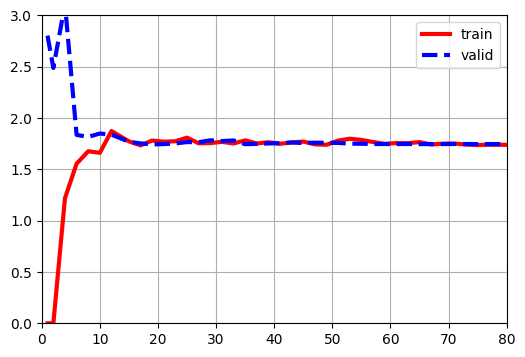

In [195]:
plt.figure(figsize = (6, 4))

plt.plot(train_size, train_score, 'r-', label = 'train', linewidth = 3)
plt.plot(train_size, valid_score, 'b--', label = 'valid', linewidth = 3)
plt.grid()
plt.axis([0, 80, 0, 3])
plt.legend()

plt.show()

# root_mean_square_error 는 값이 작을수록 좋은 성능
# 훈련셋의 성능이 검증셋의 성능이 일정 비율 이후 거의 동일해짐 (검증셋 : 훈련 중 사용되지 않는 데이터)

In [196]:
# 과대 적합 모델의 학습 곡선

from sklearn.model_selection import learning_curve

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

train_size, train_score, valid_score = learning_curve(
    LinearRegression(), X_poly, y,
    train_sizes = np.linspace(0.01, 1, 40),
    cv = 5,
    scoring = 'neg_root_mean_squared_error')

train_score = -train_score.mean(axis = 1)
valid_score = -valid_score.mean(axis = 1)

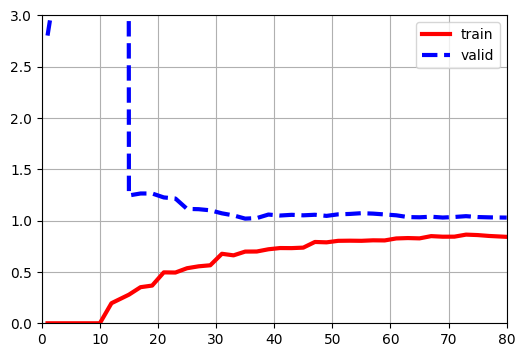

In [197]:
plt.figure(figsize = (6, 4))

plt.plot(train_size, train_score, 'r-', label = 'train', linewidth = 3)
plt.plot(train_size, valid_score, 'b--', label = 'valid', linewidth = 3)
plt.grid()
plt.axis([0, 80, 0, 3])
plt.legend()

plt.show()

# 훈련셋에 대한 성능은 좋으나 검증셋에 대한 성능과 차이가 있음
# 훈련 중 사용되지 않은 데이터에 대해 좋은 성능을 보이게 해야 함 (일반화 성능을 증가시켜야 함)

과소적합은 모델이 적절하지 않거나 데이터가 부족하면 발생할 수 있음

과대적합은 모델이 훈련 데이터에 너무 적응해버린 것

과대적합을 감소시키는 방법으로는 훈련 과정에 규제를 추가하는 것

회귀모델에 사용하는 일반적인 규제


*   릿지
*   라쏘
*   엘라스틱 넷



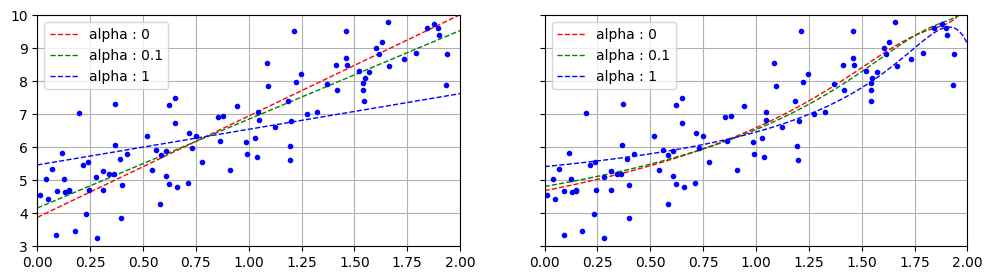

In [224]:
# SGDRegressor는 확률적 경사 하강법(Stochastic Gradient Descent)을 사용하는 회귀 모델로, 위의 세 규제를 지원, alpha : 규제 강도
# 릿지 회귀 : SGDRegressor의 penalty 를 'l2'로 지정
from sklearn.linear_model import SGDRegressor

np.random.seed(42)

X = np.random.rand(100, 1) * 2
y = 3 * X + np.random.randn(100, 1) + 4

X_new = np.linspace(0, 2, 100).reshape(100, 1)

fig, axs = plt.subplots(1, 2, figsize = (12, 3), sharex = True, sharey = True)
axs = axs.flatten()

plt.sca(axs[0])
for alpha, style in [(0, 'r--'), (0.1, 'g--'), (1, 'b--')]:
  sgd_reg = SGDRegressor(penalty = 'l2', random_state = 42, alpha = alpha)
  sgd_reg.fit(X, y.ravel())

  y_pred = sgd_reg.predict(X_new)

  plt.plot(X_new, y_pred, style, linewidth = 1  , label = f'alpha : {alpha}')

plt.plot(X, y, 'b.')
plt.grid()
plt.legend()

plt.sca(axs[1])
for alpha, style in [(0, 'r--'), (0.1, 'g--'), (1, 'b--')]:
  poly_features = PolynomialFeatures(degree = 30, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  X_new_poly = poly_features.transform(X_new)

  scaler = StandardScaler()
  X_poly = scaler.fit_transform(X_poly)
  X_new_poly = scaler.transform(X_new_poly)

  sgd_reg = SGDRegressor(penalty = 'l2', random_state = 42, alpha = alpha)
  sgd_reg.fit(X_poly, y.ravel())

  y_pred = sgd_reg.predict(X_new_poly)

  plt.plot(X_new, y_pred, style, linewidth = 1, label = f'alpha : {alpha}')

plt.plot(X, y, 'b.')
plt.grid()
plt.axis([0, 2, 3, 10])
plt.legend()

plt.show()

# 왼쪽 : 선형 회귀 모델에 규제 적용
# 오른쪽 : 10차 다항 회귀 모델에 규제 적용

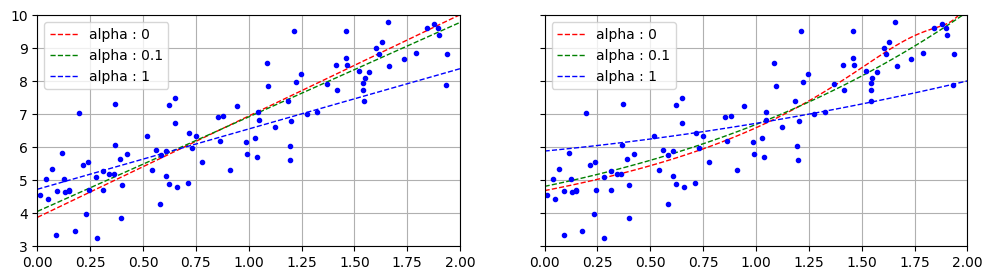

In [225]:
# 라쏘 회귀 : SGDRegressor의 penalty 를 'l1'로 지정
fig, axs = plt.subplots(1, 2, figsize = (12, 3), sharex = True, sharey = True)
axs = axs.flatten()

plt.sca(axs[0])
for alpha, style in [(0, 'r--'), (0.1, 'g--'), (1, 'b--')]:
  sgd_reg = SGDRegressor(penalty = 'l1', random_state = 42, alpha = alpha)
  sgd_reg.fit(X, y.ravel())

  y_pred = sgd_reg.predict(X_new)

  plt.plot(X_new, y_pred, style, linewidth = 1  , label = f'alpha : {alpha}')

plt.plot(X, y, 'b.')
plt.grid()
plt.legend()

plt.sca(axs[1])
for alpha, style in [(0, 'r--'), (0.1, 'g--'), (1, 'b--')]:
  poly_features = PolynomialFeatures(degree = 30, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  X_new_poly = poly_features.transform(X_new)

  scaler = StandardScaler()
  X_poly = scaler.fit_transform(X_poly)
  X_new_poly = scaler.transform(X_new_poly)

  sgd_reg = SGDRegressor(penalty = 'l1', random_state = 42, alpha = alpha)
  sgd_reg.fit(X_poly, y.ravel())

  y_pred = sgd_reg.predict(X_new_poly)

  plt.plot(X_new, y_pred, style, linewidth = 1, label = f'alpha : {alpha}')

plt.plot(X, y, 'b.')
plt.grid()
plt.axis([0, 2, 3, 10])
plt.legend()

plt.show()

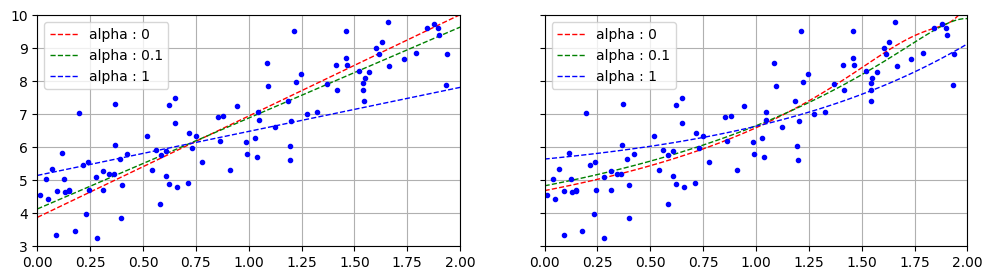

In [227]:
# 엘라스틱 넷 회귀 : SGDRegressor의 penalty 를 'elasticnet'로 지정 및 l1_ratio 를 (0, 1) 사이 값으로 지정하여 릿지&라쏘 회귀 비율 지정
fig, axs = plt.subplots(1, 2, figsize = (12, 3), sharex = True, sharey = True)
axs = axs.flatten()

plt.sca(axs[0])
for alpha, style in [(0, 'r--'), (0.1, 'g--'), (1, 'b--')]:
  sgd_reg = SGDRegressor(penalty = 'elasticnet', l1_ratio = 0.5, random_state = 42, alpha = alpha)
  sgd_reg.fit(X, y.ravel())

  y_pred = sgd_reg.predict(X_new)

  plt.plot(X_new, y_pred, style, linewidth = 1  , label = f'alpha : {alpha}')

plt.plot(X, y, 'b.')
plt.grid()
plt.legend()

plt.sca(axs[1])
for alpha, style in [(0, 'r--'), (0.1, 'g--'), (1, 'b--')]:
  poly_features = PolynomialFeatures(degree = 30, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  X_new_poly = poly_features.transform(X_new)

  scaler = StandardScaler()
  X_poly = scaler.fit_transform(X_poly)
  X_new_poly = scaler.transform(X_new_poly)

  sgd_reg = SGDRegressor(penalty = 'elasticnet', l1_ratio = 0.5, random_state = 42, alpha = alpha)
  sgd_reg.fit(X_poly, y.ravel())

  y_pred = sgd_reg.predict(X_new_poly)

  plt.plot(X_new, y_pred, style, linewidth = 1, label = f'alpha : {alpha}')

plt.plot(X, y, 'b.')
plt.grid()
plt.axis([0, 2, 3, 10])
plt.legend()

plt.show()

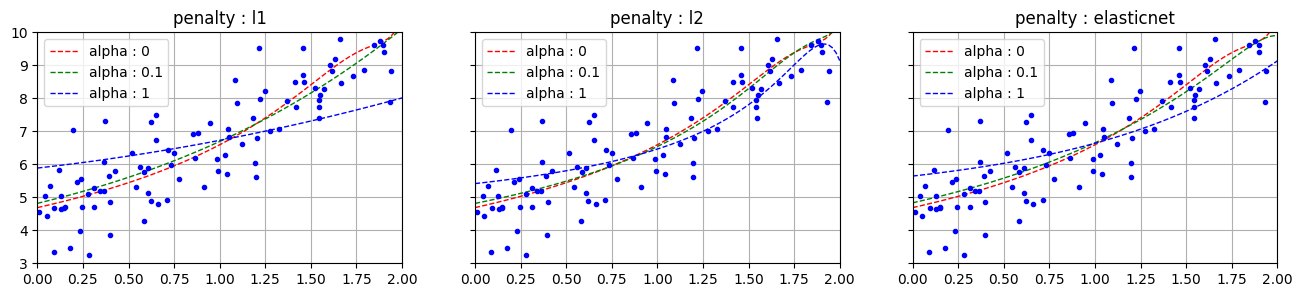

In [231]:
# 세 규제 비교

fig, axs = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (16, 3))
axs = axs.flatten()

for idx, penalty in enumerate(['l1', 'l2', 'elasticnet']):
  plt.sca(axs[idx])
  for alpha, style in [(0, 'r--'), (0.1, 'g--'), (1, 'b--')]:
    poly_features = PolynomialFeatures(degree = 30, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    X_new_poly = poly_features.transform(X_new)

    scaler = StandardScaler()
    X_poly = scaler.fit_transform(X_poly)
    X_new_poly = scaler.transform(X_new_poly)

    if penalty == 'elasticnet':
      sgd_reg = SGDRegressor(penalty = penalty, l1_ratio = 0.5, random_state = 42, alpha = alpha)
    else:
      sgd_reg = SGDRegressor(penalty = penalty, random_state = 42, alpha = alpha)
    sgd_reg.fit(X_poly, y.ravel())

    y_pred = sgd_reg.predict(X_new_poly)
    plt.plot(X_new, y_pred, style, linewidth = 1, label = f'alpha : {alpha}')

  plt.plot(X, y, 'b.')
  plt.grid()
  plt.axis([0, 2, 3, 10])
  plt.legend()
  plt.title(f'penalty : {penalty}')

plt.show()